In [1]:
import torch
# ニューラルネットワークの関数
import torch.nn as nn
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

In [4]:
# テスト用のデータを生成
X_gen , y_gen = datasets.make_regression(n_samples=100 , n_features=1 , noise=10 , random_state=1)

In [5]:
# データの形式変換
X = torch.from_numpy(X_gen.astype(np.float32))
y = torch.from_numpy(y_gen.astype(np.float32))

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


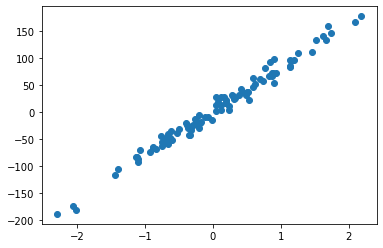

In [6]:
plt.scatter( X ,y)

In [7]:
y = y.view(-1 ,1)

In [10]:
# モデルの定義
model = nn.Linear(1 , 1)

In [12]:
# 損失をどうやって定義するのか
#平均二乗和誤差
criterion = nn.MSELoss()
# 最適化のアルゴリズムの選択　（確率的勾配効果法（SGD：Stochastic Gradient Descent）
## model.parameters  調整する値
## lrlearning rate)=0.01 ：学習率　どれぐらいの幅でパラメータを更新していくのか
optimizer = torch.optim.SGD(model.parameters() , lr=0.01)

In [19]:
epochs = 300
loss_list = []

for epoch in range(epochs):
    # 予測値を計算する 
    y_pred = model(x)
    # 損失の計算 (出力の結果；y_grad と 正解：yを渡す)
    loss = criterion(y_pred ,y)
    # 勾配を初期化する
    optimizer.zero_grad()
    # 損失を反映する
    loss.backward()
    optimizer.step()
    
    # 損失を表示する
    loss_list.append(loss.item())
    if (epoch +1) % 50 == 0:
        print(f'epoch: {epoch+1}, loss={loss.item():.4f}')

epoch: 50, loss=1209.3068
epoch: 100, loss=314.9894
epoch: 150, loss=131.3505
epoch: 200, loss=93.2289
epoch: 250, loss=85.2606
epoch: 300, loss=83.5880


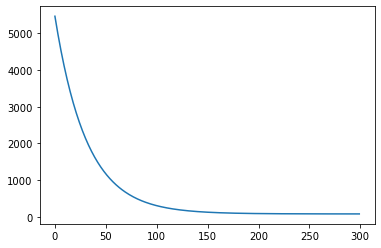

In [20]:
plt.plot(loss_list)

# 予測後の結果をグラフ化

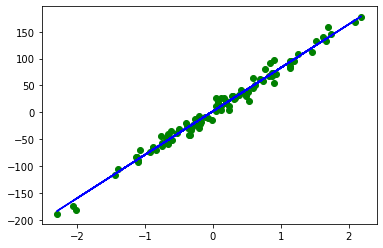

In [21]:
# Pytorchの勾配が変わらないようにする
with torch.no_grad():
    predicted_y = model(x).detach().numpy()
    
    plt.plot(X_gen ,y_gen ,'go')
    plt.plot(X_gen,predicted_y , 'b')

In [25]:
# 重み
print(model.weight)
# バイアス
print(model.bias)

Parameter containing:
tensor([[80.8630]], requires_grad=True)
Parameter containing:
tensor([2.1703], requires_grad=True)
